In [ ]:
# Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany 



> # Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany Using Python and Business Inteligence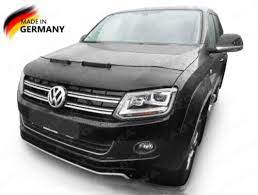
[Source of Picture](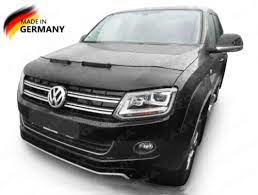)

## Mid-term-Project For the March 2023 Ironhack, Berlin By Evans and Festus 
## Dataset: Auto Sales ebay Germany Random 50k!

##  Table of Contents
1. [Description of the dataset](#2)

1. [Goals of the project¶](#3)

2. [Data Gathering and Methodology](#4)
   
3. [Data Analytics and Conclusion](#5) 
   
4. [References](#6)

#  Description of the dataset
The dataset used to complete this project was scraped in 2016 from ebay-Kleinanzeigan (Germany).
The data was made available publicly on the Kaggle by the user 'orgesleka'. 

The dataset contains seventeen columns with over 37 thousand rows of private used car listings for sale; 
the column headings and their descriptions are listed here:

**date_crawled:** When an ad was first crawled; all field-values are taken from this date.
name: Name of the car.

**price_EUR:** Listed price for the car.

**ab_test:** Whether the listing is included in an A/B test.

**vehicle_type:** The vehicle type.

**registration_year:** The year the car was first registered.

**transmission:** The transmission type.

**power_ps:** The power of the car in PS (PferdStarkeis, similar to horse power).

**model:** Car model name.

**odometer_km:** approximate kilometers the car has driven.

**registration_month:** The month the car was first registered.

**fuel_type:** Vehicle fuel type.

**brand:** Car brand.

**unrepaired_damage:** If the car has damage which is not yet repaired.

**date_created:** The date the eBay listing was created.

**postal_code:** The postal code for the location of the vehicle.

**last_seen_online:** When the crawler saw this ad last online.


# Goals of the project
## **Do data cleaning:**
    - identify and remove where applicable the outliers, missing data, duplicates, columns to drop
    - decide on the interesting features to keep
## **Carry out EDA and provide dataset summary:** 
    - Mean prices
    - max prices 
    - mode i.e most frequent car model
## **Investigate the underlying patterns and data structure:** 
    - Commonly listed brands
    - distribution of brands?
    - price variation between: 
        - relatively newer cars and older cars
        - fuel type
        - transmission type
        - car brands
        - mileage of the car
        - unrepaired_damage
    - correlations between the numerical features:
        - Price
        - power_ps 
        - mileage in Km
## **Assess the impact of Ab Testing:**
    - Viewership of the cars
## **Business Inteligence - Build a Tableau Dashboard:**
    - Are their any meaningful KPIs?
    - show impact of AB testing of such KPI.
    - comparing the transmission types, fuel types brands and prices
    - filter by top 3 model, brand, fuel types etc 
    - show an important insight/pattern about the sale of cars
    - design a clean and well readable charts that have titles, labels etc. 
## **Reveal the bigger picture:** 
     - Relate the data to the opportunity for sellers and buyers.
     - Recommnedation about the AB testing whether to launch or not to launch it.
     - Conclusion.

# Data Gathering and Methodology

1. Python libraries below will be used for EDA and for data wrangling. 
1. Dataset is publicly available in [kaggle](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned) in the format comma-separated value (CSV) file, a tabular format contained in [a zipped file](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1)

1. Tableau will be used for visualizations and Dashboard design. 



## Loading the libraries and modules

In [337]:
# import libraries 
# data cleaning
import pandas as pd
import numpy as np
import datetime as dt
#import os
from scipy import stats
#data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import matplotlib.pyplot as plt

#from requests.auth import HTTPBasicAuth
#from zipfile import ZipFile
#import io

#visualazation libraries
#import plotly.express as px
#import plotly.offline as pyo
#import plotly.graph_objs as go
#Set notebook mode to work in offline
#pyo.init_notebook_mode()




## Loading Data


In [194]:
#dataset
#df = pd.read_csv('https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1.zip',compression='zip')
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data/download?datasetVersionNumber=1
#https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen
#df = pd.read_csv('autos_random_50k_cleaned.csv')
#df = pd.read_csv('autos_random_50k.csv', encoding = 'ISO-8859-1')
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
#df = pd.read_csv("https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen.csv", encoding = 'ISO-8859-1')
#print(df)

df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
df.isna().sum()

<a id = "3"></a><br>

## Data Wrangling: Cleaning

1. We drop the first column **'unnamed'**:
1. Standardize the column names e.g price should all be in lower case
1. Convert the German words to english e.g transmission column
1. Remove Nan values
1. Remove duplicates
1. Review the regsitration year and prices of vehicles


  

### Exploring the data to know what to clean

In [195]:
#Drop the first column
#df=df.drop(df.columns[0], axis=1)
#df

In [196]:
# change to lower case
df.columns = df.columns.str.lower()
df

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [197]:
##Change column lastSeen and dateCreated to date or date time
# convert the 'Date' column to datetime format
df['lastseen']= pd.to_datetime(df['lastseen'])
df['datecreated']= pd.to_datetime(df['datecreated'])
df["viewer_index"]=(df["lastseen"]) - (df["datecreated"])
df

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,...,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen,viewer_index
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14 days 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52,23 days 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21,4 days 12:45:21


In [198]:
df.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen', 'viewer_index'],
      dtype='object')

In [199]:
#Rename columns with list
column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price_eur', 'ab_test',
       'vehicle_type', 'year_registration', 'transmission', 'power_hp', 'model',
       'mileage_km', 'month_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'number_pictures', 'postal_code',
       'last_seen','viewer_index']
df.columns = column_names
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14 days 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52,23 days 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21,4 days 12:45:21


In [200]:
du= df.duplicated().sum()
du

4

In [201]:
#drop duplicates
df = df.drop_duplicates()
df


,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14 days 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52,23 days 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21,4 days 12:45:21


In [202]:
df['transmission'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [203]:
#drop missing values
df=df.dropna(subset=['transmission'])
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,14 days 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,...,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49,0 days 10:42:49
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21,4 days 12:45:21


In [204]:
df['transmission'].unique()#translate to  German

array(['manuell', 'automatik'], dtype=object)

In [205]:
#unrepaired_damage
df['unrepaired_damage'].unique()#translate to  German

array([nan, 'ja', 'nein'], dtype=object)

In [206]:
#drop missing values
df=df.dropna(subset=['unrepaired_damage'])
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,14 days 01:46:50
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,...,150000,3,benzin,opel,nein,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,...,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49,0 days 10:42:49
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


In [207]:
df['date_crawled'].min()#no change

'2016-03-05 14:06:22'

In [208]:
df['date_crawled'].max()#no change

'2016-04-07 14:36:58'

In [209]:
df['date_crawled'].mode()#no change

0    2016-03-24 14:49:47
Name: date_crawled, dtype: object

In [210]:
df['ab_test'].unique()#No changes

array(['test', 'control'], dtype=object)

In [211]:
df.isna().sum()

date_crawled              0
name                      0
seller                    0
offer_type                0
price_eur                 0
ab_test                   0
vehicle_type          15521
year_registration         0
transmission              0
power_hp                  0
model                 10546
mileage_km                0
month_registration        0
fuel_type             15038
brand                     0
unrepaired_damage         0
date_created              0
number_pictures           0
postal_code               0
last_seen                 0
viewer_index              0
dtype: int64

In [212]:
df['vehicle_type'].unique()# to translate 'kleinwagen', 'andere', to German 

array(['coupe', 'kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv',
       'bus', nan, 'andere'], dtype=object)

In [213]:
#df['registration_year'].unique()#
df['year_registration'].unique()#To remove outliers

array([2011, 2001, 2008, 1995, 2004, 1980, 2005, 2007, 2009, 2002, 2018,
       1997, 1990, 2017, 1981, 2003, 2016, 1984, 1999, 1998, 2012, 2014,
       2006, 2010, 2000, 1993, 2013, 1994, 1992, 1991, 1996, 1989, 2015,
       1968, 1983, 1959, 1973, 1969, 1971, 1987, 1988, 1967, 1986, 1985,
       1965, 1945, 1974, 1979, 1982, 1978, 1976, 1972, 1977, 1961, 1963,
       1964, 1966, 1975, 1970, 1937, 1936, 1954, 1955, 1933, 1941, 1962,
       1960, 1951, 1910, 1940, 1953, 1935, 2019, 1957, 1958, 1956, 6000,
       1950, 4000, 1948, 1932, 1952, 1923, 1931, 5000, 1949, 1942, 1911,
       6500, 6200, 1000, 1929, 1930, 1943, 1938, 9000, 1934, 1919, 1947,
       1939, 1500, 1602, 1946, 7500, 1944, 1600])

In [214]:
df['year_registration'].min()

1000

In [215]:
df['year_registration'].max()

9000

In [216]:
df['year_registration'].mode()


0    2006
Name: year_registration, dtype: int64

In [217]:
df['year_registration'].mean()

2003.768898532472

In [218]:
df['power_hp'].unique()

array([  190,    75,    69,   102,   109,    50,   105,   140,   131,
         136,   160,   231,    90,   118,   193,   125,    99,    60,
         113,   218,   122,   129,    70,    95,   177,     0,   306,
          61,    64,   101,   232,   150,   156,    80,    82,   204,
         155,    54,    87,    86,   143,    84,   303,   224,   235,
         200,   178,   265,   163,    77,   110,   144,   120,   286,
         170,   116,   184,   126,    88,   305,   197,   179,   250,
         313,    45,    98,   115,   130,   114,   211,    56,   326,
         201,   213,   107,   174,   220,   185,    73,    41,   192,
          68,    66,    58,    52,   510,   147,    65,    71,    97,
         239,   295,   203,     5,   300,   103,    85,   245,   258,
         292,   320,    63,    81,   148,   354,    44,   145,   180,
         280,   260,   457,   104,   409,   299,   333,   186,   117,
         141,    55,    59,   132,   165,   234,   158,    39,   272,
          92,   135,

In [219]:
df['power_hp'].max()

20000

In [220]:
df['power_hp'].min()

0

In [221]:
df['power_hp'].mean()

124.37932934508817

In [222]:
df['model'].unique()

array([nan, 'golf', 'fabia', '3er', '2_reihe', 'andere', '3_reihe',
       'passat', 'navara', 'twingo', 'c_max', 'a_klasse', 'scirocco',
       '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto',
       'e_klasse', 'one', 'clio', '1er', 'b_klasse', 'signum', 'astra',
       'fortwo', 'a8', 'jetta', 'polo', 'fiesta', 'c_klasse', 'micra',
       'vito', 'sprinter', '156', 'escort', 'forester', 'scenic', 'a1',
       'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80',
       '147', 'a4', 'glk', 'z_reihe', 'sportage', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'insignia', 'megane', 'a3',
       'lupo', 'r19', 'corsa', 'cordoba', 'colt', 'impreza', 'vectra',
       'berlingo', 'm_klasse', 'tiguan', 'i_reihe', 'sharan', '6_reihe',
       'panda', 'up', 'seicento', 'ceed', 'kangoo', '5_reihe', 'yeti',
       'octavia', 'zafira', 'mii', 'rx_reihe', 'mondeo', '6er', 'modus',
       'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan', 'cuore',
       

In [223]:
#drop missing values
df=df.dropna(subset=['model'])
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58,4 days 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,...,150000,3,benzin,opel,nein,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,...,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49,0 days 10:42:49
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


In [224]:
df['model'].mode()

0    golf
Name: model, dtype: object

In [225]:
df['mileage_km'].unique()

array([150000,  90000,  40000,  70000, 100000, 125000,  60000,   5000,
        20000,  30000,  80000,  50000,  10000])

In [226]:
df['mileage_km'].max()

150000

In [227]:
df['mileage_km'].min()

5000

In [228]:
df['mileage_km'].mean()

124671.3605021907

In [229]:
df['month_registration'].unique()

array([ 6,  7, 10,  8, 12,  2,  3,  1,  4,  5,  9, 11,  0])

In [230]:
df['month_registration'].mode()

0    3
Name: month_registration, dtype: int64

In [231]:
df['fuel_type'].unique()#translate to German


array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

### Change German words to English

In [232]:
#Transmission - Standardize - translate German to English
#drop missing values
df=df.dropna(subset=['transmission'])
df
df.loc[df['transmission'].str.contains('manuell'),"transmission"] = 'manual'
df.loc[df['transmission'].str.contains('automatik'),"transmission"] = 'automatic'
#df.loc[df['transmission'].str.contains('Unknown'),"transmission"] = 'unknown'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manual,50,...,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25 16:47:58,4 days 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manual,0,...,150000,3,benzin,opel,nein,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manual,0,...,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49,0 days 10:42:49
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatic,101,...,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manual,102,...,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


In [233]:
#unrepaired_damage: Standardize - translate German to English
df.loc[df['unrepaired_damage'].str.contains('nein'),"unrepaired_damage"] = 'no'
df.loc[df['unrepaired_damage'].str.contains('ja'),"unrepaired_damage"] = 'yes'
#df.loc[df['unrepaired_damage'].str.contains('nan'),"unrepaired_damage"] = 'unknown'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manual,75,...,150000,6,benzin,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manual,69,...,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,150000,10,benzin,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,150000,8,benzin,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manual,50,...,40000,7,benzin,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58,4 days 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manual,0,...,150000,3,benzin,opel,no,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manual,0,...,150000,7,benzin,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49,0 days 10:42:49
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatic,101,...,125000,3,benzin,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manual,102,...,150000,3,diesel,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


In [234]:
#drop missing values
df=df.dropna(subset=['vehicle_type'])
#May be we should cjhange these NaN to unknown
df.loc[df['vehicle_type'].str.contains('andere'),"vehicle_type"] = 'other'
df.loc[df['vehicle_type'].str.contains('kleinwagen'),"vehicle_type"] = 'small_car'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,small_car,2001,manual,75,...,150000,6,benzin,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,small_car,2008,manual,69,...,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manual,102,...,150000,10,benzin,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manual,109,...,150000,8,benzin,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manual,50,...,40000,7,benzin,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58,4 days 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manual,225,...,150000,5,benzin,seat,yes,2016-03-19,0,96465,2016-03-19 20:44:43,0 days 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manual,0,...,150000,3,benzin,opel,no,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatic,101,...,125000,3,benzin,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manual,102,...,150000,3,diesel,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


In [235]:
#fuel type
df=df.dropna(subset=['fuel_type'])#drop missing values
df.loc[df['fuel_type'].str.contains('andere'),"fuel_type"] = 'other'
df.loc[df['fuel_type'].str.contains('benzin'),"fuel_type"] = 'petrol'
df.loc[df['fuel_type'].str.contains('elektro'),"fuel_type"] = 'elektric'


In [236]:
df['seller'].unique()

array(['privat', 'gewerblich'], dtype=object)

In [237]:
df.loc[df["seller"].str.contains('privat'),("seller")] = 'private'
df.loc[df["seller"].str.contains('gewerblich'),("seller")] = 'company'

In [238]:
df['offer_type'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [239]:
df.loc[df["offer_type"].str.contains('Angebot'),("offer_type")] = 'offer'
df.loc[df["offer_type"].str.contains('Gesuch'),("offer_type")] = 'search'

In [240]:
df['offer_type'].unique()

array(['offer', 'search'], dtype=object)

In [241]:
df['fuel_type'].unique()

array(['petrol', 'diesel', 'lpg', 'other', 'hybrid', 'cng', 'elektric'],
      dtype=object)

In [242]:
df['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [243]:
df['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [244]:
df.loc[df['brand'].str.contains('sonstige_autos'),('brand')] = 'other'


In [245]:
df['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [246]:
df['brand'].mode()

0    volkswagen
Name: brand, dtype: object

In [247]:
df["transmission"].unique()

array(['manual', 'automatic'], dtype=object)

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

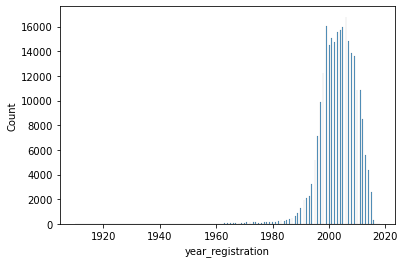

In [248]:
sns.histplot(df["year_registration"])

### Detecting outliers by visualization, and deciding whether to remove

In [249]:
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,number_pictures,postal_code,last_seen,viewer_index
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small_car,2001,manual,75,...,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small_car,2008,manual,69,...,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650,test,limousine,1995,manual,102,...,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,offer,2200,test,cabrio,2004,manual,109,...,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39,4 days 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,private,offer,0,test,limousine,1980,manual,50,...,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58,4 days 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,private,offer,3200,control,limousine,2004,manual,225,...,150000,5,petrol,seat,yes,2016-03-19,0,96465,2016-03-19 20:44:43,0 days 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150,control,bus,2000,manual,0,...,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:23,2 days 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,offer,1199,test,cabrio,2000,automatic,101,...,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12,6 days 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200,test,bus,1996,manual,102,...,150000,3,diesel,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26,19 days 07:15:26


/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1910, 2018, (260952, 21))

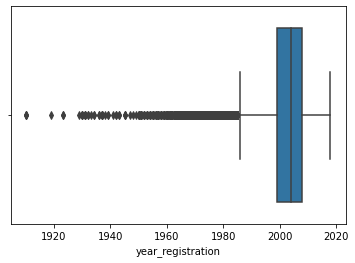

In [250]:
#outliers
#we can decide to drop od cars registered before 1980
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

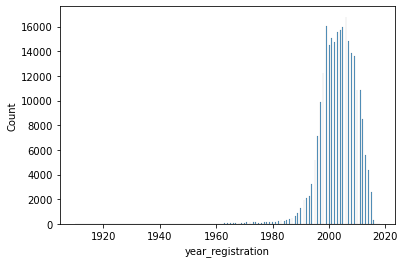

In [251]:
sns.histplot(df["year_registration"])

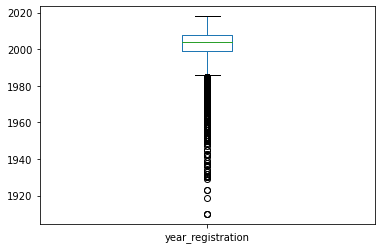

(1910, 2018, (260952, 21))

In [252]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0, 99999999, (260952, 21))

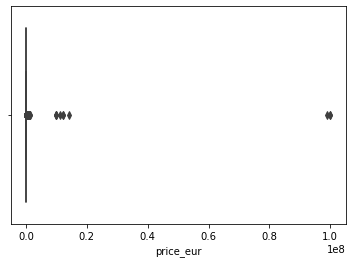

In [253]:
#This price column is tricky. We have cars that cosr zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
sns.boxplot(df['price_eur'])#huge impact of outliers on price_eur column
df["price_eur"].min(), df["price_eur"].max(), df.shape

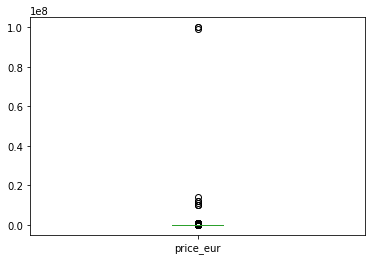

(0, 20000, (260952, 21))

In [255]:
#This is the expect clean plot without outliers
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["power_hp"].min(), df["power_hp"].max(), df.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0, 20000, (260952, 21))

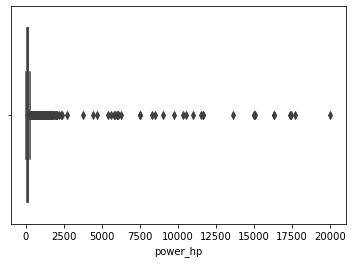

In [256]:
#power_PS
sns.boxplot(df['power_hp'])
df["power_hp"].min(), df["power_hp"].max(), df.shape#Huge but this column of not important to us

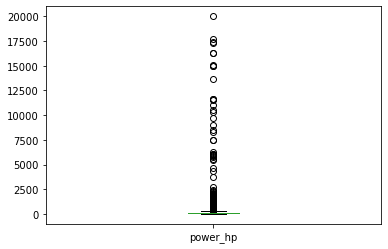

(0, 20000, (260952, 20))

In [259]:
#We can drop this column because it has many outliers, which if we remove, we will impact heavily on the entire fetures of the data set
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"power_hp")
df["power_hp"].min(), df["power_hp"].max(), df.shape

In [262]:
#drop 'number_pictures' column
df.drop('number_pictures', axis=1, inplace=True)
df

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(5000, 150000, (260952, 20))

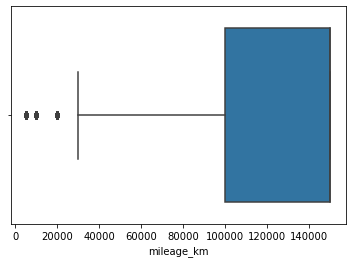

In [263]:
#mileage_km: No need to change anything here because its obvious we have low mileages of cars
sns.boxplot(df['mileage_km'])
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

In [ ]:
sns.histplot(df["mileage_km"])

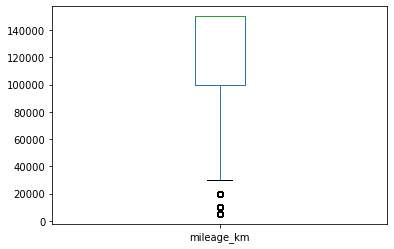

(5000, 150000, (260952, 20))

In [264]:
#This leave this column as it is, because its reality to have cars with mileage less than 20000
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"mileage_km")
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

### Remove outliers in the year of Registration and price_eur columns but carefully using boxplot visualization and interquartile range or z score 

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_72643/1386855525.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



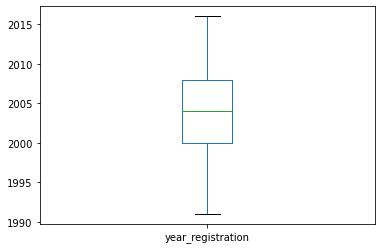

(1986, 2018, (257563, 21))

In [265]:
df["z_score_yr"]= stats.zscore(df["year_registration"])
df1 =df.loc[df["z_score_yr"].abs()<=2]
def plot_boxplot(df1, ft):
    df1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df1,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape
##
# IQR
Q1 = np.percentile(df['year_registration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['year_registration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
df2=df
# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df2['year_registration'] < (Q1 - 1.5 * IQR)) | (df2['year_registration'] > (Q3 + 1.5 * IQR)))#.any(axis=1)

# Filter our dataframe based on condition
df2 = df2[condition]
df2['year_registration'].min(), df2['year_registration'].max(), df2.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1910, 2018, (260952, 21))

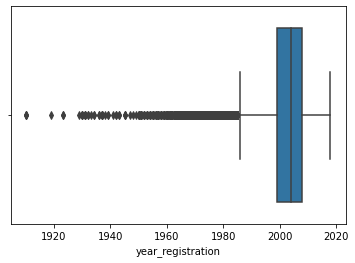

In [266]:
#year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

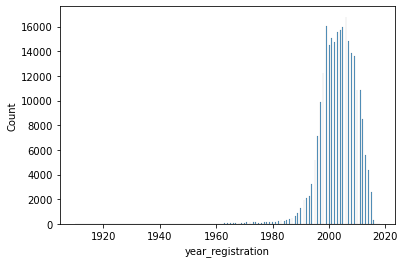

In [267]:
sns.histplot(df["year_registration"])

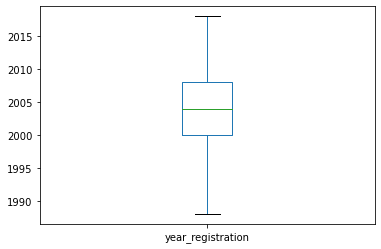

(1988, 2018, (256745, 21))

In [268]:
#The best optimal threshold is 1987 as cut off
df=df[df["year_registration"]>1987]
#we can decide to drop od cars registered before 1980
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape,

#df["year_registration"].unique()

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1988, 2018, (256745, 21))

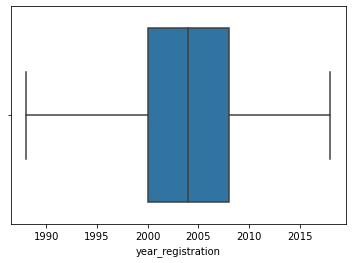

In [269]:
#confirm or recheck the efeect of removal of outliers on year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_72643/1722279412.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



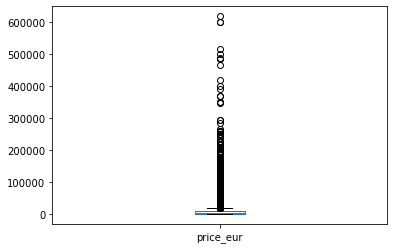

(0, 619000, (256729, 22))

In [270]:
#Price_eur
df["z_score_pr"]= stats.zscore(df["price_eur"])
df1 =df.loc[df["z_score_pr"].abs()<=2]
def plot_boxplot(df1, ft):
    df1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df1,"price_eur")
df1["price_eur"].min(), df1["price_eur"].max(), df1.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

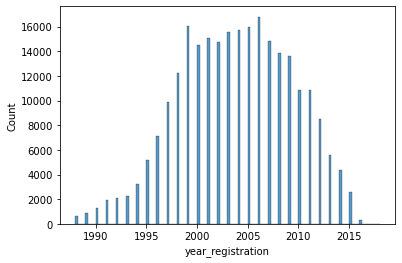

In [271]:
sns.histplot(df1["year_registration"])

In [272]:
df1["price_eur"].min(), df1["price_eur"].max(), df1.shape

(0, 619000, (256729, 22))

In [273]:
# IQR
Q1 = np.percentile(df["price_eur"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df["price_eur"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
df2=df
# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df2["price_eur"] < (Q1 - 1.5 * IQR)) | (df2["price_eur"] > (Q3 + 1.5 * IQR)))#.any(axis=1)

# Filter our dataframe based on condition
df2 = df2[condition]
df2["price_eur"].min(), df2["price_eur"].max(), df2.shape

(0, 19000, (240058, 22))

In [ ]:
sns.boxplot(df2["price_eur"])

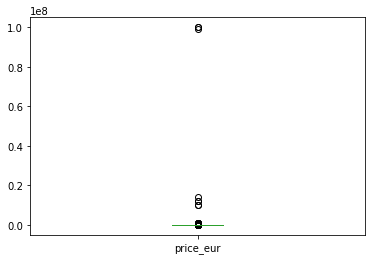

(0, 99999999, (256745, 22))

In [275]:
#This price_eur column is tricky. We have cars that cost zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0, 99999999, (256745, 22))

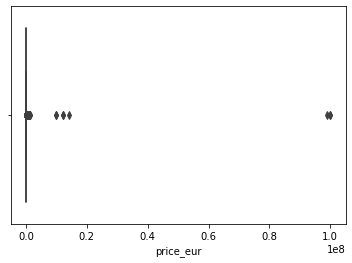

In [276]:
#price_eur check with seaborn reveal huge effect of outliers
sns.boxplot(df['price_eur'])
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [192]:
sns.histplot(df["price_eur"])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7febb9f2f430> (for post_execute):


KeyboardInterrupt: 

In [281]:
dfab= df[df["price_eur"]>100000]
dfab

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index,z_score_yr,z_score_pr
996,2016-03-25 12:42:09,Porsche_997_GT3_MKII_EIN_SAMMLERSTÜCK_IN_VOLLA...,private,offer,139997,test,coupe,2010,manual,435,...,3,petrol,porsche,no,2016-03-25,71159,2016-04-06 13:45:07,12 days 13:45:07,1.027376,0.382637
6409,2016-03-27 10:53:53,Porsche_911_964_original_WTL_Cabrio,private,offer,119911,control,cabrio,1993,manual,250,...,7,petrol,porsche,no,2016-03-27,85375,2016-03-29 00:15:34,2 days 00:15:34,-1.583113,0.324387
10555,2016-03-28 03:36:23,Porsche_911_Carrera_Cabriolet_Ruf_Turbo_Look,private,offer,110000,control,cabrio,1989,manual,218,...,6,petrol,porsche,no,2016-03-28,41189,2016-04-06 10:44:23,9 days 10:44:23,-2.197345,0.295644
10649,2016-04-05 09:36:18,Porsche_996_GT2_MK2_Clubsport,private,offer,420000,control,coupe,2004,manual,483,...,4,petrol,porsche,no,2016-04-05,81669,2016-04-07 12:15:38,2 days 12:15:38,0.106027,1.194665
13302,2016-03-20 21:49:18,Porsche_911_Targa_4_GTS,private,offer,192500,test,cabrio,2015,automatic,430,...,4,petrol,porsche,no,2016-03-20,36043,2016-04-07 07:16:29,18 days 07:16:29,1.795167,0.534900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363249,2016-03-26 23:41:12,Porsche_911_4S_Cabriolet__WLS___Garantie___Voll,private,offer,116000,test,cabrio,2013,automatic,430,...,4,petrol,porsche,no,2016-03-26,4808,2016-03-26 23:41:12,0 days 23:41:12,1.488050,0.313044
365287,2016-03-08 13:58:07,Porsche_991_GT3RS_Sofort_verfuegbar.,private,offer,250000,control,coupe,2016,automatic,500,...,2,petrol,porsche,no,2016-03-08,85551,2016-03-17 06:15:59,9 days 06:15:59,1.948725,0.701654
366164,2016-03-19 17:56:45,Renault_Scenic_Vollauslastung_Premium,private,offer,110000,control,limousine,2009,manual,130,...,6,diesel,renault,no,2016-03-19,88289,2016-03-19 18:42:06,0 days 18:42:06,0.873818,0.295644
366259,2016-03-18 18:46:38,Porsche_Boxster_Spyder,private,offer,118900,control,cabrio,2015,manual,375,...,10,petrol,porsche,no,2016-03-18,59227,2016-04-03 21:45:49,16 days 21:45:49,1.795167,0.321455


/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(501, 19999, (225992, 22))

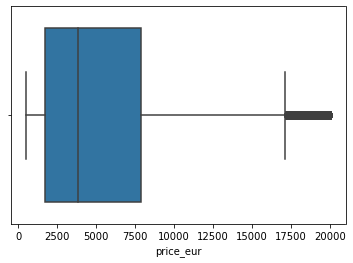

In [283]:
#The best upper threshold =14666, lower = we choose 500
df=df[df["price_eur"]<20000]
df=df[df["price_eur"]>500]
sns.boxplot(df['price_eur'])

df["price_eur"].min(), df["price_eur"].max(), df.shape

<AxesSubplot:xlabel='price_eur', ylabel='Count'>

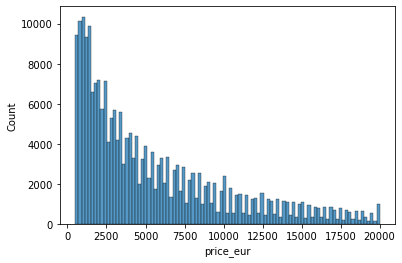

In [284]:
sns.histplot(df["price_eur"])

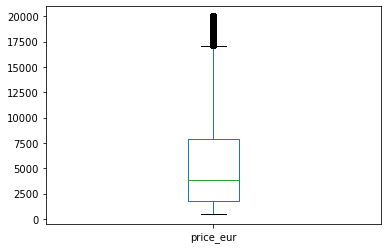

(501, 19999, (225992, 22))

In [285]:
#Check
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [289]:
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index,z_score_yr,z_score_pr
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small_car,2001,manual,75,...,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0 days 17:40:17,-0.354647,-0.019014
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small_car,2008,manual,69,...,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,6 days 10:17:21,0.720260,-0.012923
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650,test,limousine,1995,manual,102,...,10,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2 days 19:17:07,-1.275996,-0.021479
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,offer,2200,test,cabrio,2004,manual,109,...,8,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,4 days 18:18:39,0.106027,-0.016983
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,offer,2000,control,limousine,2004,manual,105,...,12,petrol,mazda,no,2016-03-26,96224,2016-04-06 10:45:34,11 days 10:45:34,0.106027,-0.017563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371518,2016-04-02 20:37:03,Bmw_320_D_DPF_Touring_!!!,private,offer,3999,test,kombi,2005,manual,3,...,5,diesel,bmw,no,2016-04-02,81825,2016-04-06 20:47:12,4 days 20:47:12,0.259585,-0.011766
371520,2016-03-19 19:53:49,turbo_defekt,private,offer,3200,control,limousine,2004,manual,225,...,5,petrol,seat,yes,2016-03-19,96465,2016-03-19 20:44:43,0 days 20:44:43,0.106027,-0.014083
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150,control,bus,2000,manual,0,...,3,petrol,opel,no,2016-03-27,26624,2016-03-29 10:17:23,2 days 10:17:23,-0.508206,-0.020029
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,offer,1199,test,cabrio,2000,automatic,101,...,3,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12,6 days 18:17:12,-0.508206,-0.019886


In [301]:
abtest= df[df["ab_test"]=="test"]
abtest = abtest[["ab_test","viewer_index"]]

In [302]:
abtest

,ab_test,viewer_index
3,test,0 days 17:40:17
4,test,6 days 10:17:21
5,test,2 days 19:17:07
6,test,4 days 18:18:39
18,test,13 days 18:45:11
...,...,...
371512,test,13 days 00:44:51
371517,test,5 days 18:16:20
371518,test,4 days 20:47:12
371524,test,6 days 18:17:12


In [303]:
abcontrol = df[df["ab_test"]=="control"]
abcontrol= abcontrol[["ab_test","viewer_index"]]
abcontrol

,ab_test,viewer_index
10,control,11 days 10:45:34
11,control,0 days 10:25:17
14,control,16 days 07:45:42
17,control,17 days 13:16:07
20,control,4 days 16:45:49
...,...,...
371511,control,6 days 12:46:41
371513,control,16 days 15:45:01
371516,control,2 days 11:17:13
371520,control,0 days 20:44:43


In [288]:
df.isna().sum()

date_crawled          0
name                  0
seller                0
offer_type            0
price_eur             0
ab_test               0
vehicle_type          0
year_registration     0
transmission          0
power_hp              0
model                 0
mileage_km            0
month_registration    0
fuel_type             0
brand                 0
unrepaired_damage     0
date_created          0
postal_code           0
last_seen             0
viewer_index          0
z_score_yr            0
z_score_pr            0
dtype: int64

In [ ]:
#Now have a clean file
#we can write it to our directory
df.to_csv("car_cleaned.csv", index=False)

### Mean, Max, min and mode for diffrent variables

In [372]:
df['year_registration'].mode(),(df['year_registration'].min()),df['year_registration'].max()#2006#1988#2018

(0    2006
 Name: year_registration, dtype: int64,
 1988,
 2018)

In [373]:
df['power_hp'].min(),df['power_hp'].max()#(0, 20000)


(0, 20000)

In [376]:
df['mileage_km'].mean(), df['mileage_km'].min(),df['mileage_km'].max()#126851, 5000, 150000

(126850.90622676909, 5000, 150000)

In [377]:
df['price_eur'].mean(), df['price_eur'].min(),df['price_eur'].max()#5435, 501, 19999

(5435.907359552551, 501, 19999)

In [378]:
df['model'].mode()


0    golf
Name: model, dtype: object

In [379]:
df['brand'].mode()

0    volkswagen
Name: brand, dtype: object

### Hypothesis testing: Factors impacting on prices, are the significant?

#### Prices verses age of the car: Older and newer cars. 

In [305]:
#age_group<2018>2003=newer
df['age_group']=np.where((df['year_registration']>2003),"newer","older")

df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index,z_score_yr,z_score_pr,age_group
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small_car,2001,manual,75,...,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0 days 17:40:17,-0.354647,-0.019014,older
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small_car,2008,manual,69,...,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,6 days 10:17:21,0.720260,-0.012923,newer
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650,test,limousine,1995,manual,102,...,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2 days 19:17:07,-1.275996,-0.021479,older
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,offer,2200,test,cabrio,2004,manual,109,...,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,4 days 18:18:39,0.106027,-0.016983,newer
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,offer,2000,control,limousine,2004,manual,105,...,petrol,mazda,no,2016-03-26,96224,2016-04-06 10:45:34,11 days 10:45:34,0.106027,-0.017563,newer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371518,2016-04-02 20:37:03,Bmw_320_D_DPF_Touring_!!!,private,offer,3999,test,kombi,2005,manual,3,...,diesel,bmw,no,2016-04-02,81825,2016-04-06 20:47:12,4 days 20:47:12,0.259585,-0.011766,newer
371520,2016-03-19 19:53:49,turbo_defekt,private,offer,3200,control,limousine,2004,manual,225,...,petrol,seat,yes,2016-03-19,96465,2016-03-19 20:44:43,0 days 20:44:43,0.106027,-0.014083,newer
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150,control,bus,2000,manual,0,...,petrol,opel,no,2016-03-27,26624,2016-03-29 10:17:23,2 days 10:17:23,-0.508206,-0.020029,older
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,offer,1199,test,cabrio,2000,automatic,101,...,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12,6 days 18:17:12,-0.508206,-0.019886,older


In [312]:
age_new= df[df["age_group"]=="newer"]
age_new = age_new[["price_eur"]]
age_new = age_new.rename(columns={'price_eur':"age_newer_price"})
age_new
#


,age_newer_price
4,3600
6,2200
10,2000
11,2799
14,17999
...,...
371506,5900
371513,4400
371517,7900
371518,3999


In [313]:
age_old= df[df["age_group"]=="older"]
age_old = age_old[["price_eur"]]
age_old = age_old.rename(columns={'price_eur':"age_older_price"})
age_old
#


,age_older_price
3,1500
5,650
21,3699
25,2500
29,690
...,...
371512,5000
371516,1490
371521,1150
371524,1199


<AxesSubplot:xlabel='age_older_price', ylabel='Count'>

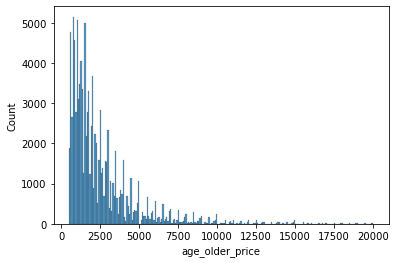

In [320]:
sns.histplot(age_old["age_older_price"])


<AxesSubplot:xlabel='age_newer_price', ylabel='Count'>

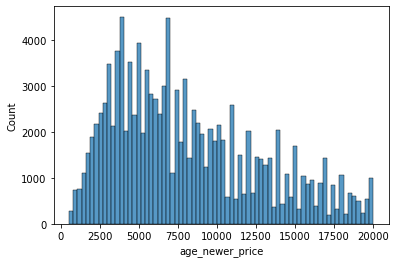

In [321]:
sns.histplot(age_new["age_newer_price"])

In [328]:
df.head()

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index,z_score_yr,z_score_pr,age_group
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small_car,2001,manual,75,...,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0 days 17:40:17,-0.354647,-0.019014,older
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small_car,2008,manual,69,...,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,6 days 10:17:21,0.720260,-0.012923,newer
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650,test,limousine,1995,manual,102,...,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2 days 19:17:07,-1.275996,-0.021479,older
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,offer,2200,test,cabrio,2004,manual,109,...,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,4 days 18:18:39,0.106027,-0.016983,newer
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,offer,2000,control,limousine,2004,manual,105,...,petrol,mazda,no,2016-03-26,96224,2016-04-06 10:45:34,11 days 10:45:34,0.106027,-0.017563,newer


#### Prices verses unrepaired damaged: damaged and repaired. 

In [331]:
damaged= df[df["unrepaired_damage"]=="yes"]
damaged = damaged[["price_eur"]]
damaged = damaged.renamere(columns={'price_eur':"price_damaged"})
damaged

,price_damaged
5,650
11,2799
25,2500
55,550
62,7499
...,...
371487,3800
371488,2999
371505,800
371512,5000


In [333]:
repaired= df[df["unrepaired_damage"]=="no"]
repaired = repaired[["price_eur"]]
repaired = repaired.rename(columns={'price_eur':"price_repaired"})
repaired

,price_repaired
3,1500
4,3600
6,2200
10,2000
14,17999
...,...
371517,7900
371518,3999
371521,1150
371524,1199


### To find the commonly listed brand

In [ ]:
#Counts the occurence of each unique value

counts = df['brand'].value_counts()

In [ ]:
#  find the most common value (i.e., the value with the highest count)

most_common_value = counts.idxmax()

most_common_value

### Distribution of brands?

In [ ]:
# create a bar chart of the value counts

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, width=0.8)
plt.title("Brand Distribution")  
plt.xticks(rotation=90, size=9) #"vertical"
plt.show()

In [ ]:
#drop missing values
df=df.dropna(subset=["price_eur"])
df

In [ ]:
#outliers
#create a histogram

sns.histplot(df["price_eur"])

In [ ]:
df=df.sort_values(by="price_eur", ascending=False)
#df.dtypes
df

In [ ]:
#outliers
#create a histogram

sns.histplot(df["year_registration"])

In [ ]:
#outliers
#create a histogram

#sns.histplot(df["power_hp"])#dropped

In [ ]:
#outliers
#create a histogram
sns.histplot(df["mileage_km"])

In [ ]:
df

In [ ]:
sns.histplot(df['mileage_km']
           ,color = 'navy'
            ,kde = True
            )

In [ ]:
#outliers
#create a histogram
sns.histplot(df["month_registration"],kde = True)##be categorical

### Price variation between: relatively newer cars and older cars

In [354]:
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,power_hp,...,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index,z_score_yr,z_score_pr,age_group
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small_car,2001,manual,75,...,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0 days 17:40:17,-0.354647,-0.019014,older
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small_car,2008,manual,69,...,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,6 days 10:17:21,0.720260,-0.012923,newer
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650,test,limousine,1995,manual,102,...,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2 days 19:17:07,-1.275996,-0.021479,older
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,offer,2200,test,cabrio,2004,manual,109,...,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,4 days 18:18:39,0.106027,-0.016983,newer
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,offer,2000,control,limousine,2004,manual,105,...,petrol,mazda,no,2016-03-26,96224,2016-04-06 10:45:34,11 days 10:45:34,0.106027,-0.017563,newer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371518,2016-04-02 20:37:03,Bmw_320_D_DPF_Touring_!!!,private,offer,3999,test,kombi,2005,manual,3,...,diesel,bmw,no,2016-04-02,81825,2016-04-06 20:47:12,4 days 20:47:12,0.259585,-0.011766,newer
371520,2016-03-19 19:53:49,turbo_defekt,private,offer,3200,control,limousine,2004,manual,225,...,petrol,seat,yes,2016-03-19,96465,2016-03-19 20:44:43,0 days 20:44:43,0.106027,-0.014083,newer
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150,control,bus,2000,manual,0,...,petrol,opel,no,2016-03-27,26624,2016-03-29 10:17:23,2 days 10:17:23,-0.508206,-0.020029,older
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,private,offer,1199,test,cabrio,2000,automatic,101,...,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12,6 days 18:17:12,-0.508206,-0.019886,older


In [ ]:
df['fuel_type'].unique()

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



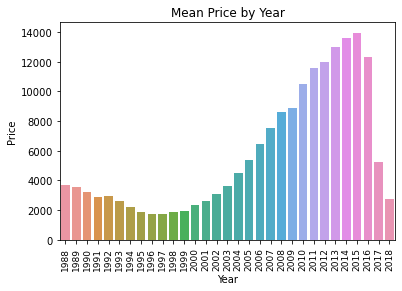

In [355]:
#year of registration
mean_prices = df.groupby('year_registration')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

In [ ]:
### Price variation between fuel_type and prices

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



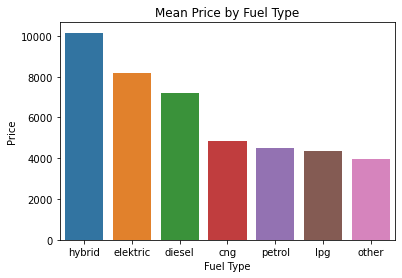

In [365]:
#df.boxplot(column='price_eur', by='fuel_type')

# set the chart title and axis labels
#plt.title('Price Variations by Fuel Type')
#plt.xlabel('Fuel Type')
#plt.ylabel('Price')

# display the chart
#plt.show()


mean_prices = df.groupby('fuel_type')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

# display the chart
plt.show()

### Price variation between transmission type and prices

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



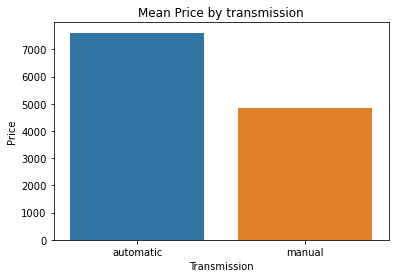

In [363]:
mean_prices = df.groupby('transmission')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")

# display the chart
plt.show()


In [ ]:
df.columns

### Price variation between transmission type and prices

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



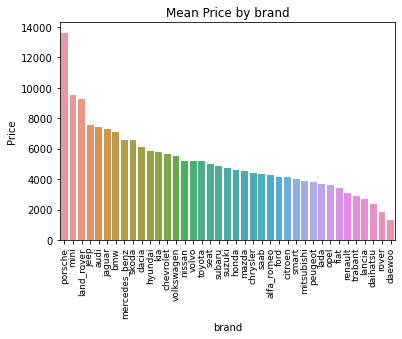

In [353]:
mean_prices = df.groupby('brand')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by brand")
plt.xlabel("brand")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Price variation between car mileage and prices

In [344]:
mean_prices

mileage_km
5000       6209.729104
10000     12068.001337
20000     10654.344854
30000     10497.491031
40000     10269.677139
50000      9724.928236
60000      9254.852028
70000      8604.630277
80000      7963.857610
90000      7386.487477
100000     6852.716273
125000     5888.719012
150000     4172.062076
Name: price_eur, dtype: float64

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '5000'),
  Text(1, 0, '10000'),
  Text(2, 0, '20000'),
  Text(3, 0, '30000'),
  Text(4, 0, '40000'),
  Text(5, 0, '50000'),
  Text(6, 0, '60000'),
  Text(7, 0, '70000'),
  Text(8, 0, '80000'),
  Text(9, 0, '90000'),
  Text(10, 0, '100000'),
  Text(11, 0, '125000'),
  Text(12, 0, '150000')])

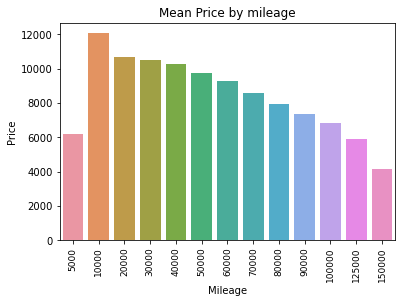

In [346]:
mean_prices = df.groupby('mileage_km')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
sns.barplot(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 



### Price variation between unrepaired_damage and prices

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



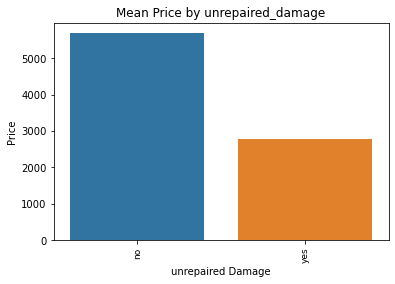

In [348]:
mean_prices = df.groupby('unrepaired_damage')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by unrepaired_damage")
plt.xlabel("unrepaired Damage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Correlation between numerical features

In [356]:
#numericals
numericals=df.select_dtypes(include = np.number)
numericals

,price_eur,year_registration,power_hp,mileage_km,month_registration,postal_code,viewer_index,z_score_yr,z_score_pr
3,1500,2001,75,150000,6,91074,0 days 17:40:17,-0.354647,-0.019014
4,3600,2008,69,90000,7,60437,6 days 10:17:21,0.720260,-0.012923
5,650,1995,102,150000,10,33775,2 days 19:17:07,-1.275996,-0.021479
6,2200,2004,109,150000,8,67112,4 days 18:18:39,0.106027,-0.016983
10,2000,2004,105,150000,12,96224,11 days 10:45:34,0.106027,-0.017563
...,...,...,...,...,...,...,...,...,...
371518,3999,2005,3,150000,5,81825,4 days 20:47:12,0.259585,-0.011766
371520,3200,2004,225,150000,5,96465,0 days 20:44:43,0.106027,-0.014083
371521,1150,2000,0,150000,3,26624,2 days 10:17:23,-0.508206,-0.020029
371524,1199,2000,101,125000,3,26135,6 days 18:17:12,-0.508206,-0.019886


In [357]:
numericals.columns

Index(['price_eur', 'year_registration', 'power_hp', 'mileage_km',
       'month_registration', 'postal_code', 'viewer_index', 'z_score_yr',
       'z_score_pr'],
      dtype='object')

In [358]:
numericals=numericals[['price_eur', 'year_registration', 'power_hp', 'mileage_km']]
numericals

,price_eur,year_registration,power_hp,mileage_km
3,1500,2001,75,150000
4,3600,2008,69,90000
5,650,1995,102,150000
6,2200,2004,109,150000
10,2000,2004,105,150000
...,...,...,...,...
371518,3999,2005,3,150000
371520,3200,2004,225,150000
371521,1150,2000,0,150000
371524,1199,2000,101,125000


In [ ]:
#numericals.drop('viewer_index', axis=1, inplace=True)
#numericals.drop('postal_code', axis=1, inplace=True)
#numericals.drop('power_hp', axis=1, inplace=True)
#numericals

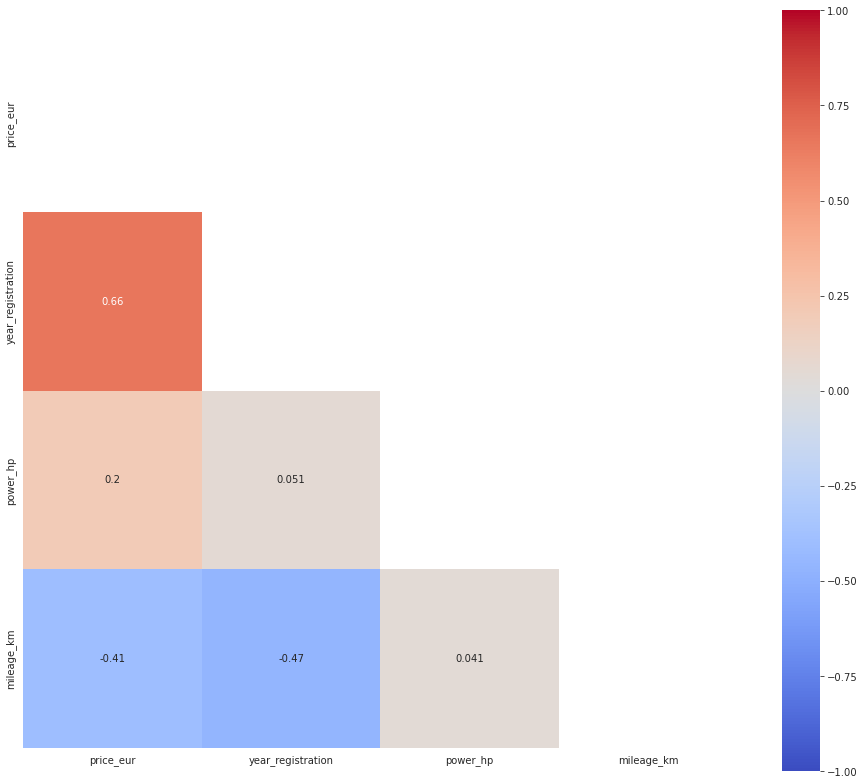

In [359]:
corr =numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Data Analytics and Conclusion

## Data Cleaning<br>

1. **What was done?** <br>
EDA?<br> Data cleaning? <br> Missing values? <br> Duplicates?<br> outliers<br> columns to drop<br>

1. **How was it done?** <br> 
1. **Results Summary**<br>

## Exploration Data Analyses<br>
1. **EDA and summary of dataset**<br>
Mean prices<br> max prices <br>
mode i.e most frequent car model<br>
1. **Results Summary**<br>

1. **Underlying patterns and data structure:**<br>
Commonly listed brands<br>
Brand distribution? <br> Newer and older cars?<br> fuel type?<br> transmission type?<br> mean prices?<br> most frequent brand?<br>mileage of the car<br> unrepaired_damage?

1. **Any correlations?** <br> Numerical features: <br> Price?<br> power_hp?<br> mileage in Km?<br>
1. **Results Summary**<br>

## Business Intelligence<br>
1. **Ab Testing on viewership of the cars?** <br>

1. **Final Design of a Tableau Dashboard and take home message?** <br>
1. **Results Summary**<br>

## Conclusions<br>
1. **Bigger picture**<br>
1. **Recommendations**<br>
1. **Summary**<br>
1. **Results Summary**<br>


In [ ]:
#code
#Do data cleaning


In [ ]:
#code
#EDA and provide summary into the dataset

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

# Evans is my project partner

# References
1. https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned